## Ariane particels on long MITgcm run (CNT03)

203 particles initialized at day 5 at different upstream positions  and depths in CNT run03 

In [1]:
from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

#from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys
#####
from matplotlib import pylab

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.cm as cm

from matplotlib import animation


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt

In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [4]:
CGrid ='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob_cropped.nc' 

CGridOut=Dataset(CGrid)
CState ='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob_cropped.nc' 



In [13]:
# General input
npart = 203
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 


rc = CGridOut.variables['RC']


dxf = CGridOut.variables['dxF']
xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

rA = rout.getField(CGrid, 'rA') 

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGrid, 'HFacC')
mask_NoC = rout.getMask(CGrid, 'HFacC')

bathy = rout.getField(CGrid,'Depth')
times = np.arange(0,nt,1)


In [14]:
f = Dataset('/ocean/kramosmu/Ariane/TracerExperiments/CNTDIFF/run03_372part/ariane_trajectories_qualitative.nc','r');

#for dimobj in f.variables.values():
#    print dimobj


In [15]:
f_lont=f.variables['traj_lon']
f_latt=f.variables['traj_lat']
f_dept=f.variables['traj_depth']
f_timet=f.variables['traj_time']

f_zs=f.variables['init_z']
f_xs=f.variables['init_x']
f_ys=f.variables['init_y']
f_lont.shape

(20, 203)

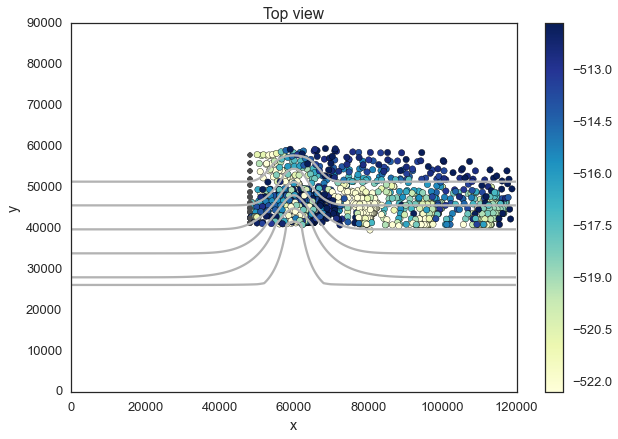

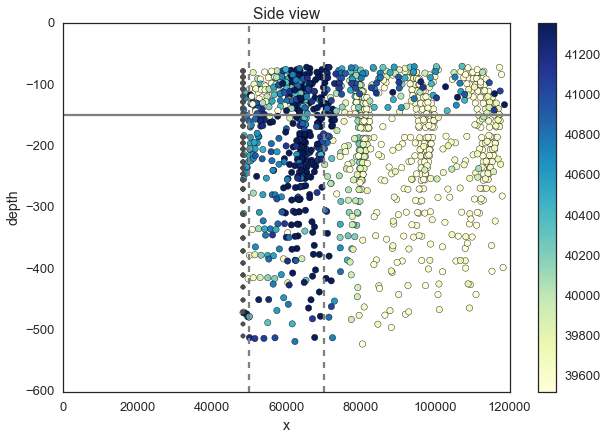

In [57]:
n = np.arange(npart)
colors = cm.rainbow(np.linspace(0, 1, len(n)))
#mkr = ['o','s','*','^','D','d','p','>','h','<']
# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))
ax.contour(xc,yc,bathy,[150,350,550,750,950,1150],colors = '0.70')

for N in n:
    lonMasked = np.ma.masked_less_equal(f_lont[:,N], f_lont[0,N])
    latMasked = np.ma.masked_array(f_latt[:,N], mask=lonMasked.mask)
    deptMasked = np.ma.masked_array(f_dept[:,N], mask=lonMasked.mask)
    
    sca = ax.scatter(lonMasked,latMasked,c=deptMasked,marker = 'o',s=40,cmap = 'YlGnBu')
    ax.scatter(f_lont[0,N],f_latt[0,N],color='0.30',marker='o')


plt.colorbar(sca)

ax.set_xlim([0,120000])
ax.set_ylim([0,90000])
ax.set_title('Top view')
ax.set_xlabel('x')
ax.set_ylabel('y')


# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))
for N in n:
    
    lonMasked = np.ma.masked_less_equal(f_lont[:,N], f_lont[0,N])
    latMasked = np.ma.masked_array(f_latt[:,N], mask=lonMasked.mask)
    deptMasked = np.ma.masked_array(f_dept[:,N], mask=lonMasked.mask)
    
    sca=ax.scatter(lonMasked,deptMasked,c=latMasked,marker='o',s=40,cmap = 'YlGnBu')
    ax.scatter(f_lont[0,N],f_dept[0,N],color='0.30',marker='o')
plt.colorbar(sca)
ax.axhline(y=-150.0,color = '0.5')
ax.axvline(x=70000.0,color = '0.5', linestyle = '--')
ax.axvline(x=50000.0,color = '0.5', linestyle = '--')

ax.set_xlim([0,120000])

ax.set_title('Side view')
ax.set_xlabel('x')
ax.set_ylabel('depth')



In [53]:
f = Dataset('/ocean/kramosmu/Ariane/TracerExperiments/CNTDIFF/run03_372part/ariane_trajectories_qualitative.nc','r');

f_lont=f.variables['traj_lon']
f_latt=f.variables['traj_lat']
f_dept=f.variables['traj_depth']
f_timet=f.variables['traj_time']

f_zs=f.variables['init_z']
f_xs=f.variables['init_x']
f_ys=f.variables['init_y']
f_ts=f.variables['init_t']

print(f_zs[:])


[ 16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  16.  18.  18.  18.
  18.  18.  18.  18.  18.  18.  18.  18.  18.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  22.  22.  22.  22.  22.  22.  22.  22.  22.
  22.  22.  22.  24.  24.  24.  24.  24.  24.  24.  24.  24.  24.  24.  26.
  26.  26.  26.  26.  26.  26.  26.  26.  26.  28.  28.  28.  28.  28.  28.
  28.  28.  28.  30.  30.  30.  30.  30.  30.  30.  30.  32.  32.  32.  32.
  32.  32.  32.  32.  34.  34.  34.  34.  34.  34.  34.  34.  36.  36.  36.
  36.  36.  36.  36.  36.  37.  37.  37.  37.  37.  37.  37.  38.  38.  38.
  38.  38.  38.  38.  39.  39.  39.  39.  39.  39.  39.  40.  40.  40.  40.
  40.  40.  40.  41.  41.  41.  41.  41.  41.  41.  42.  42.  42.  42.  42.
  42.  43.  43.  43.  43.  43.  43.  44.  44.  44.  44.  44.  44.  45.  45.
  45.  45.  45.  45.  46.  46.  46.  46.  46.  47.  47.  47.  47.  47.  48.
  48.  48.  48.  49.  49.  49.  49.  50.  50.  50.  51.  51.  51.  52.  52.
  52.  53.  

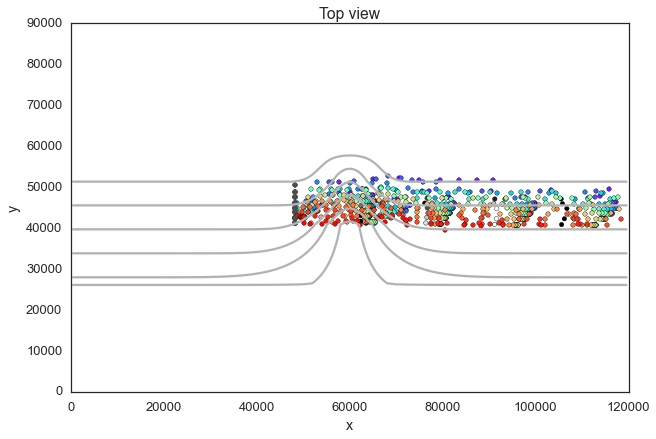

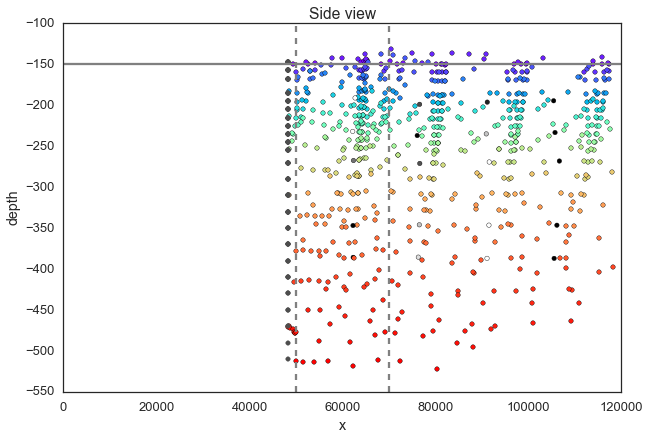

In [72]:
n = np.arange(npart)
colors = cm.rainbow(np.linspace(0, 1, len(n[79:203])))
#mkr = ['o','s','*','^','D','d','p','>','h','<']
# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))
ax.contour(xc,yc,bathy,[150,350,550,750,950,1150],colors = '0.70')

for N in range(79,203,1):
    
    lonMasked = np.ma.masked_less_equal(f_lont[:,N], f_lont[0,N])
    latMasked = np.ma.masked_array(f_latt[:,N], mask=lonMasked.mask)
    deptMasked = np.ma.masked_array(f_dept[:,N], mask=lonMasked.mask)
    
    sca = ax.scatter(lonMasked,latMasked,c=colors[N-79])
    ax.scatter(f_lont[0,N],f_latt[0,N],color='0.30',marker='o')


#plt.colorbar(sca)

ax.set_xlim([0,120000])
ax.set_ylim([0,90000])
ax.set_title('Top view')
ax.set_xlabel('x')
ax.set_ylabel('y')


# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))
for N in range(79,203,1):
    
    lonMasked = np.ma.masked_less_equal(f_lont[:,N], f_lont[0,N])
    latMasked = np.ma.masked_array(f_latt[:,N], mask=lonMasked.mask)
    deptMasked = np.ma.masked_array(f_dept[:,N], mask=lonMasked.mask)
    
    sca=ax.scatter(lonMasked,deptMasked,c=colors[N-79])
    ax.scatter(f_lont[0,N],f_dept[0,N],color='0.30',marker='o')
#plt.colorbar(sca)
ax.axhline(y=-150.0,color = '0.5')
ax.axvline(x=70000.0,color = '0.5', linestyle = '--')
ax.axvline(x=50000.0,color = '0.5', linestyle = '--')

ax.set_xlim([0,120000])

ax.set_title('Side view')
ax.set_xlabel('x')
ax.set_ylabel('depth')



All particles started at day 5


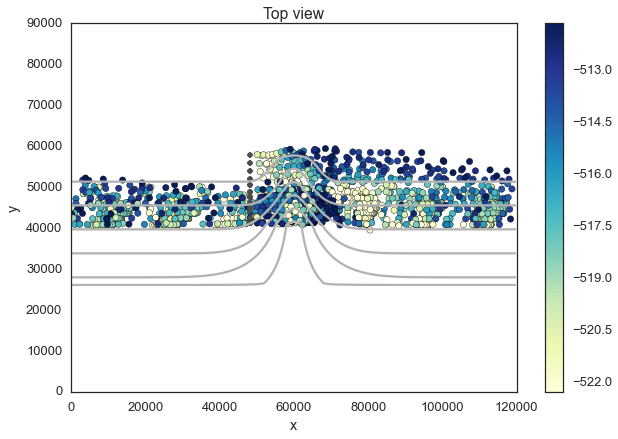

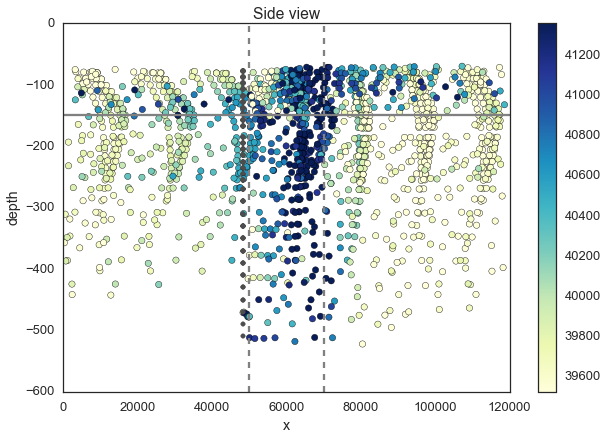